In [1]:
import requests
import utils

url = 'https://adventofcode.com/2021/leaderboard/private/view/1075819.json'
#url = 'https://adventofcode.com/2020/leaderboard/private/view/1066392.json'
request = requests.get(url, cookies=utils.get_cookies())
data = request.json()

In [2]:
import pandas as pd

df = pd.json_normalize(data['members'].values())
df = df[['name', 'local_score', 'stars'] + list(sorted(df.columns[6:], key=lambda x: float(x[21:-12])))]
df.columns = ['name', 'score' ,'stars'] + [col[21:-12] for col in df.columns[3:]]

local_time = + 1 # CEST

df['accumulated_time'] = pd.Timedelta(0)
for i in range(3, df.shape[1]-1):
    df[df.columns[i]] = pd.to_datetime(df[df.columns[i]], unit='s') + \
        pd.Timedelta(local_time, unit='H')
    if i%2 == 0:
        df[df.columns[i]] -= df[df.columns[i-1]]
        df['accumulated_time'] += df[df.columns[i]]

df = df.sort_values('score', ascending=False)

def style_data(x):
    if isinstance(x, pd.Timestamp):
        return x.strftime('%H:%M:%S')
    if isinstance(x, pd.Timedelta):
        return str(x)[-8:]
    return x

df.style.format(style_data).hide_index()

name,score,stars,1.1,1.2,2.1,2.2,3.1,3.2,4.1,4.2,5.1,5.2,accumulated_time
Arnau Q,134,10,08:56:48,00:02:38,08:17:02,00:03:07,09:44:49,00:30:14,10:07:12,00:11:57,09:28:56,00:20:05,01:08:01
Andreu Vall Hernàndez,124,10,08:24:30,00:07:44,09:11:17,00:02:02,12:33:15,00:27:39,10:01:43,00:09:16,11:17:50,00:08:50,00:55:31
albertsalles4,120,10,10:22:07,00:08:49,09:21:50,00:02:31,10:10:11,00:15:24,11:54:16,00:12:10,10:26:11,00:09:42,00:48:36
David Rial Figols,99,9,10:36:31,00:08:55,09:31:31,00:02:43,07:09:12,00:36:45,16:58:57,00:06:52,11:25:20,NaT,NaT
Antonio Tigri,77,8,15:22:36,00:12:46,10:56:21,00:03:52,11:37:32,00:34:25,12:27:54,00:17:41,NaT,NaT,NaT
Arnau Martínez Tomàs,74,8,23:53:14,00:45:12,10:23:49,00:25:47,12:59:36,00:30:52,11:25:20,00:12:41,NaT,NaT,NaT
sarabase,67,8,18:32:58,00:18:29,12:06:40,00:03:32,11:23:58,00:55:36,17:37:14,00:06:45,NaT,NaT,NaT
EstherRH00,66,8,13:11:40,00:42:39,21:05:03,00:03:25,13:39:55,00:23:11,13:20:28,00:16:00,NaT,NaT,NaT
Oriol Saguillo Gonzalez,0,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
🦉⚴ | Sylvie Liz Shadow | BLM | 💙💖🤍💖💙,0,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


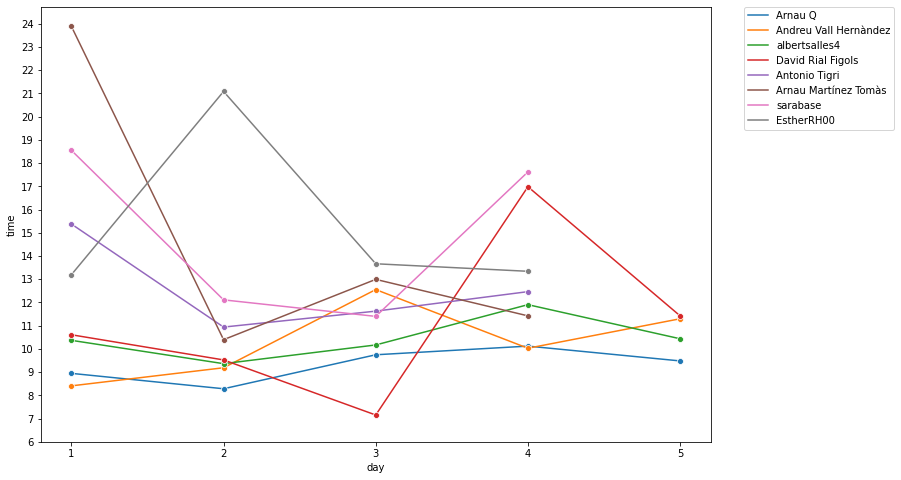

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

days = int(df.columns[-2].split('.')[0])

times_data = []
for idx, row in df.iterrows():
    #if row['score'] >= 800:
        for day in range(1, days+1):
            date = row[f'{day}.1']
            if not pd.isnull(date):
                time = date.hour + date.minute/60 + date.second/3600
                if time >= 6:
                    times_data.append({'name': row['name'], 'day': day, 'time': time})

times = pd.DataFrame(times_data)

plt.figure(figsize=(12,8))

ax = sns.lineplot(data=times, x='day', y='time', hue='name', marker='o')

ax.set_yticks(range(6, 25))
ax.set_xticks(range(1, days+1))

_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [4]:
import plotly.express as px

plt.figure(figsize=(4,4))

fig = px.line(times, x='day', y='time', line_group='name', color='name', markers=True, width=800)
fig.update_yaxes(dtick=2)
fig.update_xaxes(dtick=1)

fig.show()

<Figure size 288x288 with 0 Axes>